EJERCICIO 1: IMPLEMENTACIÓN TRANSFORMADA DISCRETA DE FOURIER

Text(0.5, 0, 'Frequency')

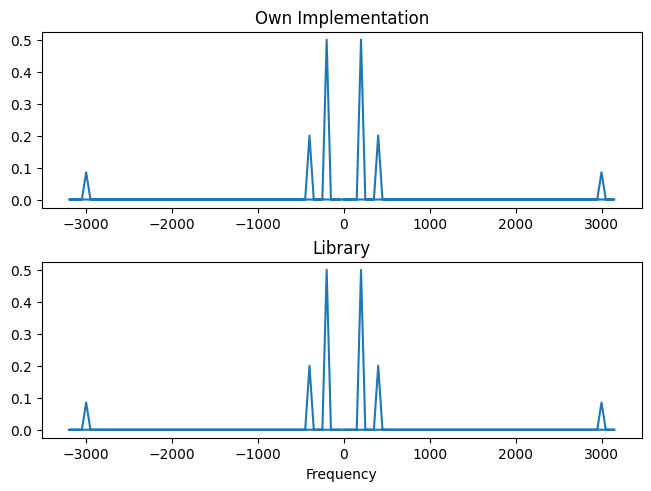

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.fftpack import fft, fftfreq

# Construcción de la señal
N = 128 # number of point in the whole interval
f = 200.0 #  frequency in Hz
dt = 1 / (f * 32 ) #32 samples per unit frequency
t = np.linspace( 0, (N-1)*dt, N)
y = np.cos(2 * np.pi * f * t) - 0.4 * np.sin(2 * np.pi * (2*f) * t )+ 0.17*np.sin(2 * np.pi * (15*f) * t )

# 1) implemente de la transformada de fourier discreta

Y = np.empty(N, dtype=complex)

for k in range(N):
    sum = 0.0
    for n in range(N):
        sum  += y[n]*np.exp(-2*1j*np.pi*k*n/N)
    Y[k] = sum

Y = Y/N

# 2) Genere el arreglo de las frecuencias (ver documentación de fftfreq):

freq = fftfreq(N, dt)

# 3) Haga una gráfica comparando método propio con implementación de scipy.fftpack.fft

fft_x = fft(y) / N # FFT Normalized

fig, axs = plt.subplots(2, layout='constrained')
axs[0].set_title("Own Implementation")
axs[0].plot(freq, np.abs(Y))

axs[1].set_title("Library")
axs[1].plot(freq, np.abs(fft_x))
axs[1].set_xlabel(f"Frequency")

EJERCICIO 2: FILTRO DE FOURIER

/usr/lib64/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/lib64/python3.9/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Filtered Signal')

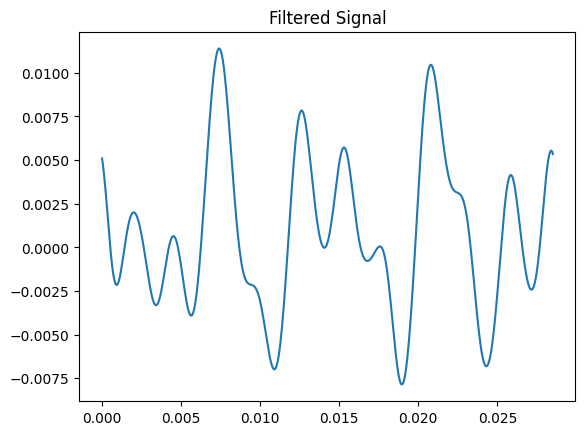

In [34]:
import numpy as np
import matplotlib.pylab as plt
from scipy.fftpack import fft, ifft, fftfreq

# 1) Almacene los datos de signal.dat. La columna 1 es el tiempo y la columna 2 es su señal f(t).
#Grafique su señal en función del tiempo.

time, f_t = np.genfromtxt("signal.dat", delimiter=",", unpack=True)

#plt.plot(time, f_t)


# 2) Use fftfreq (BONO si usa su implementación propia) y haga una gráfica de su transformada de fourier en función de las frecuencias.

N = f_t.size
dt = (time[-1] - time[0])/time.size
W = fftfreq(N, dt)
fft_w = fft(f_t) / N

#plt.plot(W, np.abs(fft_w))
#plt.axvline(x=800, color='r', linestyle='--', label='x = 1000') # Mirando donde cortar


# 3) Haga un filtro pasa bajos que le permita filtrar el ruido de la señal del punto 1. #
#Use la gráfica de la transformada de fourier del punto 3 para determinar un valor apropiado de la frecuencia de corte que debe usar para filtrar dicho ruido de alta frecuencia.

for i in range(N):
    if np.abs(W[i]) > 800:
        fft_w[i] = 0.0

#plt.plot(W, np.abs(fft_w))


# 4) Grafique la señal filtrada

y_t = ifft(fft_w)
plt.plot(time, y_t)
plt.title(f"Filtered Signal")

EJERCICIO 3 (hagánlo cuando terminen los de transformada de Fourier 2D): FILTROS VIOLIN-TROMPETA

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from scipy.fftpack import fft, fftfreq

# 1) Almacene los datos de violin.wav (use wav.read('violin.wav')).
#Grafique su señal en función del tiempo y guarde dicha gráfica.

# 2) Use fftfreq (BONO si usa su implementación propia) y haga una gráfica de su transformada de fourier en función de las frecuencias.

# 3) Haga un filtro que elimine el pico principal. Grafique su señal filtrada.
#Escuche (OJO con el volumen!) sus datos filtrados.
#Repita lo anterior haciendo un filtro pasaaltos y uno pasabajos.

#NOTA: para el manejo de archivos .wav mire la documentacion de python de input-output en https://docs.scipy.org/doc/scipy-0.14.0/reference/io.html)

# 4) repita lo anterior para trumpet.wav que es la señal correspondiente al sonido de una trompeta tocando la misma nota que el violín del puntos anterior.


EJERCICIO 4: FILTRO RUIDO PERIÓDICO IMAGEN 2D

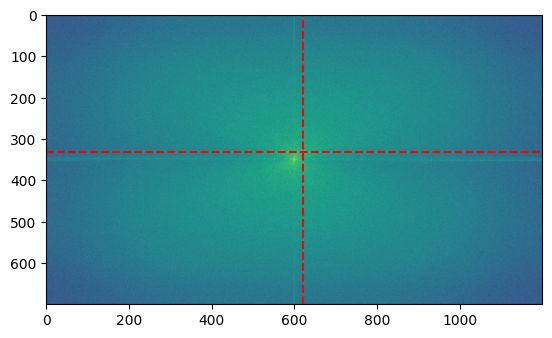

In [36]:
import numpy as np
import matplotlib.pylab as plt
from scipy.fftpack import fft, fft2, ifft2, fftfreq, fftshift

# 1) Almacene los datos de la imagen (use imread: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html)

image_mat = plt.imread("moon.jpg")

# 2) Use la librería de scipy de transformada de fourier en 2d y la trasnformada inversa
#(https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft2.html)
#para hacer un código que filtre el ruido periodico que tiene la imagen de la luna.

N = image_mat.size
fft_kxky = fft2(image_mat)/N

fft_kxky_shift = fftshift(fft_kxky)

plt.imshow(np.log(np.abs(fft_kxky_shift)))
plt.axvline(x=620, color='r', linestyle='--', label='x = 1000') # Mirando done cortar
plt.axhline(y=330, color='r', linestyle='--', label='x = 1000')



#3) haga una gráfica de la imagen filtrada y guárdela en LunaFiltrada.png

#imagen: https://blogs.3ds.com/simulia/wp-content/uploads/sites/18/2019/07/NASA_Moon.jpg


EJERCICIO 5: FASE Y MAGNITUD

In [ ]:
#Recupere la imagen original a partir de la fase y la amplitud de la transformada de fourier (archivos amplitude.dat y phase.dat).
#Recuerde que la transformada de fourier tiene una parte real y una imaginaria
#y recuerde tambien que un numero complejo se puede escribir a partir de la fase y la magnitud que son los datos que usted tiene
#(http://webpages.ursinus.edu/lriley/ref/complex/node1.html)


#1)Descargue los datos de fase y magnitud
#2) construya la transformada de fourier
#3) Obtenga la imagen haciendo la transformada inversa
